In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf 

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.optimizers import adam_v2
from keras.optimizers import rmsprop_v2
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import AvgPool2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import glob
from zipfile import ZipFile

In [ ]:
%matplotlib inline

In [ ]:
df="/content/drive/MyDrive/Colab Notebooks/dataset3616"

In [ ]:
os.listdir(df)

['Viral', 'Covid', 'Normal']

In [ ]:
covid_img=[]
normal_img=[]
viral_img=[]
filenames = os.listdir(df)
for filename in glob.glob(df+'/Covid/*'):
    covid_img.append(mpimg.imread(filename))
for filename in glob.glob(df+'/Normal/*'):
    normal_img.append(mpimg.imread(filename))
for filename in glob.glob(df+'/Viral/*'):
    viral_img.append(mpimg.imread(filename))

In [ ]:
print(len(covid_img),len(normal_img), len(viral_img))

3616 3616 1345


###  Preprocessing

In [ ]:
Img_WID=256
Img_HEI=256
channel=3

input_shape=(Img_WID, Img_HEI, channel)
Nb_classes=3
epochs=50
batch_size=32

### Model creation


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 activation='relu',input_shape=(256,256,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.50))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.50))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=3,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

###  Data splitting

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    df,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

Found 6006 images belonging to 3 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    df, 
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 2571 images belonging to 3 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 10,
)

Epoch 1/10
187/187 [==============================] - 120s 638ms/step - loss: 0.1633 - accuracy: 0.9382 - val_loss: 0.4261 - val_accuracy: 0.8457
Epoch 2/10
187/187 [==============================] - 119s 638ms/step - loss: 0.1579 - accuracy: 0.9412 - val_loss: 0.3017 - val_accuracy: 0.8926
Epoch 3/10
187/187 [==============================] - 119s 639ms/step - loss: 0.1713 - accuracy: 0.9334 - val_loss: 0.3193 - val_accuracy: 0.8855
Epoch 4/10
187/187 [==============================] - 119s 636ms/step - loss: 0.1457 - accuracy: 0.9449 - val_loss: 0.2759 - val_accuracy: 0.8992
Epoch 5/10
187/187 [==============================] - 119s 638ms/step - loss: 0.1514 - accuracy: 0.9406 - val_loss: 0.3037 - val_accuracy: 0.8934
Epoch 6/10
187/187 [==============================] - 119s 636ms/step - loss: 0.1390 - accuracy: 0.9486 - val_loss: 0.3031 - val_accuracy: 0.8906
Epoch 7/10
187/187 [==============================] - 119s 638ms/step - loss: 0.1511 - accuracy: 0.9421 - val_loss: 0.3441 -

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 40,initial_epoch=10)

Epoch 11/40
187/187 [==============================] - 119s 639ms/step - loss: 0.1618 - accuracy: 0.9377 - val_loss: 0.3564 - val_accuracy: 0.8699
Epoch 12/40
187/187 [==============================] - 119s 635ms/step - loss: 0.1389 - accuracy: 0.9434 - val_loss: 0.2858 - val_accuracy: 0.8934
Epoch 13/40
187/187 [==============================] - 119s 638ms/step - loss: 0.1507 - accuracy: 0.9386 - val_loss: 0.3159 - val_accuracy: 0.8852
Epoch 14/40
187/187 [==============================] - 119s 636ms/step - loss: 0.1493 - accuracy: 0.9436 - val_loss: 0.3367 - val_accuracy: 0.8820
Epoch 15/40
187/187 [==============================] - 119s 636ms/step - loss: 0.1461 - accuracy: 0.9439 - val_loss: 0.2823 - val_accuracy: 0.9031
Epoch 16/40
187/187 [==============================] - 120s 640ms/step - loss: 0.1675 - accuracy: 0.9354 - val_loss: 0.2861 - val_accuracy: 0.8906
Epoch 17/40
187/187 [==============================] - 119s 637ms/step - loss: 0.1439 - accuracy: 0.9446 - val_loss: 0

In [ ]:
model.evaluate(validation_generator)

81/81 [==============================] - 36s 447ms/step - loss: 0.2847 - accuracy: 0.8985


[0.28471803665161133, 0.8984830975532532]

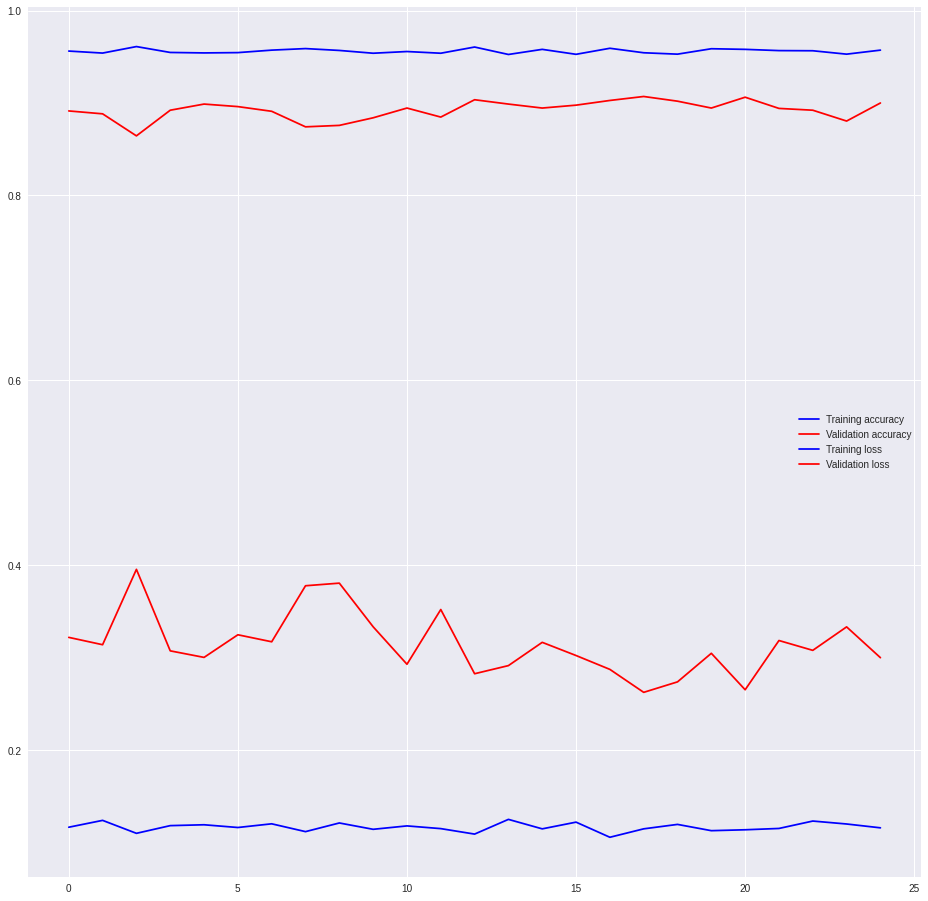

<Figure size 576x396 with 0 Axes>

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(16,16))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/train_vs_val3616.jpg')

In [ ]:
pred=model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
Y_pred = model.predict_generator(validation_generator,
                                 2571 // batch_size+1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[973  67  44]
 [ 74 930  80]
 [  2  17 384]]


In [ ]:
print('Classification Report')
target_names = ['Covid', 'Normal', 'Viral']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Covid       0.93      0.90      0.91      1084
      Normal       0.92      0.86      0.89      1084
       Viral       0.76      0.95      0.84       403

    accuracy                           0.89      2571
   macro avg       0.87      0.90      0.88      2571
weighted avg       0.90      0.89      0.89      2571

